In [26]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shanegerami","key":"0c32ffffd343776b8cd094b718ef52a5"}'}

In [27]:
!mkdir -p ~/.kaggle

In [28]:
!cp kaggle.json ~/.kaggle/

In [29]:
!chmod 600 ~/.kaggle/kaggle.json

In [30]:
!kaggle competitions download -c digit-recognizer

  0% 0.00/15.3M [00:00<?, ?B/s]
100% 15.3M/15.3M [00:00<00:00, 172MB/s]


In [31]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [32]:
import pandas as pd
df = pd.read_csv("/content/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_sample = pd.read_csv("/content/sample_submission.csv")
df_sample.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [33]:
df['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [34]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [35]:
X_train = train.drop(columns=["label"]).values
y_train = train["label"].values

In [36]:
#Normalizing the pixel values
X_train = X_train / 255.0

In [37]:
#Reshaping
X_train = X_train.reshape(-1, 28, 28, 1)

In [38]:
#One-hot encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)

In [39]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
263/263 [==============================] - 13s 7ms/step - loss: 0.3323 - accuracy: 0.9003 - val_loss: 0.0846 - val_accuracy: 0.9727
Epoch 2/10
263/263 [==============================] - 1s 5ms/step - loss: 0.0868 - accuracy: 0.9740 - val_loss: 0.0499 - val_accuracy: 0.9840
Epoch 3/10
263/263 [==============================] - 2s 6ms/step - loss: 0.0581 - accuracy: 0.9820 - val_loss: 0.0478 - val_accuracy: 0.9848
Epoch 4/10
263/263 [==============================] - 2s 7ms/step - loss: 0.0479 - accuracy: 0.9854 - val_loss: 0.0391 - val_accuracy: 0.9871
Epoch 5/10
263/263 [==============================] - 2s 6ms/step - loss: 0.0387 - accuracy: 0.9877 - val_loss: 0.0474 - val_accuracy: 0.9860
Epoch 6/10
263/263 [==============================] - 2s 7ms/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0384 - val_accuracy: 0.9874
Epoch 7/10
263/263 [==============================] - 2s 6ms/step - loss: 0.0264 - accuracy: 0.9912 - val_loss: 0.0377 - val_accuracy: 0.9887
Epoch

In [ ]:
# Save the entire model to a HDF5 file
model.save('mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
files.download('mnist_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Preprocessing the test set

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('mnist_model.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [51]:
X_test = test.values / 255.0  # Normalize
X_test = X_test.reshape(-1, 28, 28, 1)  # Reshape for the neural network

In [ ]:
#Enhancing the model architecture

In [40]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),

    # First Conv block
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    # Second Conv block
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    # Flatten
    tf.keras.layers.Flatten(),

    # Dense layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    # Output layer
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.fit(X_train, y_train, epochs=25, batch_size=64, validation_split=0.2)

Epoch 1/25
525/525 [==============================] - 13s 11ms/step - loss: 0.2101 - accuracy: 0.9351 - val_loss: 0.1854 - val_accuracy: 0.9380
Epoch 2/25
525/525 [==============================] - 5s 10ms/step - loss: 0.0740 - accuracy: 0.9769 - val_loss: 0.0398 - val_accuracy: 0.9885
Epoch 3/25
525/525 [==============================] - 5s 10ms/step - loss: 0.0544 - accuracy: 0.9829 - val_loss: 0.0302 - val_accuracy: 0.9908
Epoch 4/25
525/525 [==============================] - 5s 10ms/step - loss: 0.0453 - accuracy: 0.9865 - val_loss: 0.0352 - val_accuracy: 0.9900
Epoch 5/25
525/525 [==============================] - 5s 9ms/step - loss: 0.0411 - accuracy: 0.9867 - val_loss: 0.0397 - val_accuracy: 0.9885
Epoch 6/25
525/525 [==============================] - 5s 10ms/step - loss: 0.0372 - accuracy: 0.9878 - val_loss: 0.0322 - val_accuracy: 0.9907
Epoch 7/25
525/525 [==============================] - 5s 9ms/step - loss: 0.0319 - accuracy: 0.9902 - val_loss: 0.0407 - val_accuracy: 0.9892


In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                      

In [42]:
model.save('mnist_model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
files.download('mnist_model2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

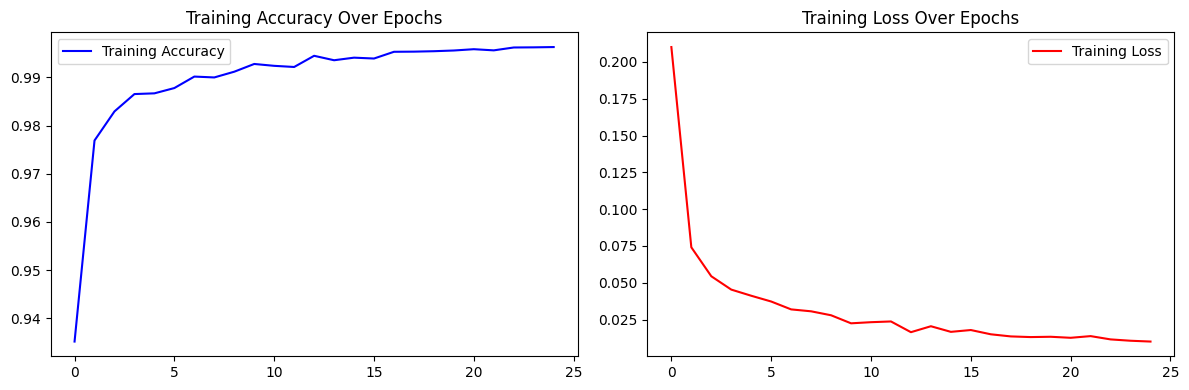

In [44]:
import matplotlib.pyplot as plt

# Data from the model's training history
history_data = model.history.history

# Plotting
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_data['accuracy'], label='Training Accuracy', color='blue')
plt.title('Training Accuracy Over Epochs')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_data['loss'], label='Training Loss', color='red')
plt.title('Training Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [45]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Example with 5 splits

accuracies = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]


    # Evaluate the model on the validation fold
    _, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    accuracies.append(accuracy)

# Calculate average accuracy over all folds
avg_accuracy = np.mean(accuracies)
print(f"Average accuracy over all folds: {avg_accuracy * 100:.2f}%")

Average accuracy over all folds: 99.76%


In [ ]:
#Evaluating the model on an external sample

Saving 6.jpg to 6 (1).jpg


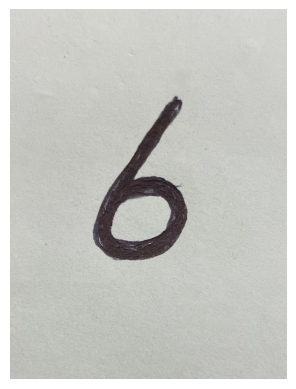

In [46]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

uploaded = files.upload()

# Get the image name
sample_5 = list(uploaded.keys())[0]

# Open and display the image
img = Image.open(sample_5)
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.show()

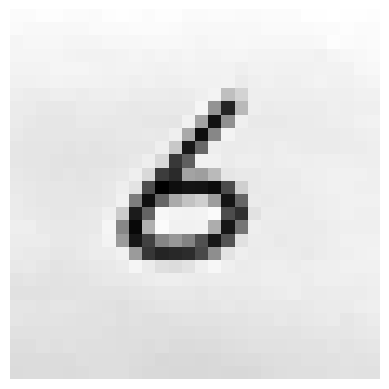

In [47]:
import numpy as np

# Convert the image to grayscale
img = img.convert("L")

# Resize the image to 28x28 pixels
img = img.resize((28, 28))

# Convert the image to a Numpy array and invert (because background will be white and MNIST has black background)
img_array = 255 - np.array(img)

# Normalize the pixel values
img_array = img_array / 255.0

# Reshape the image data for the model
img_array = img_array.reshape(1, 28, 28, 1)

plt.imshow(img, cmap="gray")
plt.axis('off')
plt.show()

In [48]:
# Make predictions
predictions = model.predict(img_array)
predicted_digit = np.argmax(predictions)

print(f"Predicted digit: {predicted_digit}")

1/1 [==============================] - 0s 137ms/step
Predicted digit: 6


In [52]:
predictions = model.predict(X_test)
predicted_digits = np.argmax(predictions, axis=1)
print(predicted_digits)

875/875 [==============================] - 2s 2ms/step
[2 0 9 ... 3 9 2]


In [53]:
# Create a dataframe with ImageId and Label columns
submission = pd.DataFrame({
    "ImageId": range(1, len(predicted_digits) + 1),
    "Label": predicted_digits
})

# Display the first few rows to check
print(submission.head())

# Save the dataframe to a CSV file without the index column
submission.to_csv("submission.csv", index=False)

files.download("submission.csv")

   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      0
4        5      3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>